In [1]:
from urban_growth.model_refactor import *
from urban_growth.simulator_refactor import *
from matplotlib import pyplot as plt
from scipy.spatial import distance
%matplotlib inline

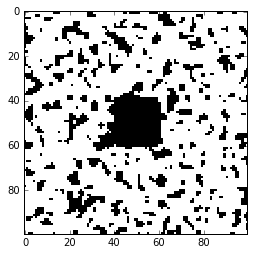

In [2]:
# Initial Configuration
L = 100
rho = .43
blur = 1

# Create the initial matrix and initialize a settlement_model object
M0 = random_mat(L, rho, blur = blur)
m = simulator(M0 = M0)

# Visualize the initial condition
plt.imshow(m.M0, interpolation = 'nearest', cmap = 'Greys')

In [3]:
m.update_morphology()
m.partition_clusters([50, 100])
m.edt()
m.distance_variables()

urban_growth/helpers.py:32: RuntimeWarning: invalid value encountered in divide
  x = - 1 / (3.0 * a) * (b + C1 + d0 / C1)


urban_growth/helpers.py:36: RuntimeWarning: divide by zero encountered in power
  return 2 * theta * (r_0 ** (2.0 - gamma) - r_1 ** (2.0 - gamma)) / (gamma - 2.0)


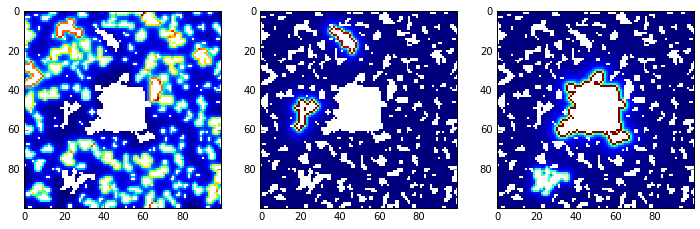

In [4]:
M = m.distance_feature(gamma = 2.5, partitioned = True)
fig, axarr = plt.subplots(1, 3, figsize=(12, 4))

for i in range(M.shape[0]):
    im = axarr[i].imshow(M[i], interpolation = 'nearest')

Next on the agenda is to pass in vector parameters and compute densities, sample. Then on to EM, I think! 

In [5]:
alpha = [9, 10, 8]
beta  = [-10, -10, -10]
gamma = [2.1, 3.3, 3.4]

test = m.logistic_components(alpha, beta, gamma)
test_density = m.logistic_density(alpha = alpha, beta = beta, gamma = gamma)

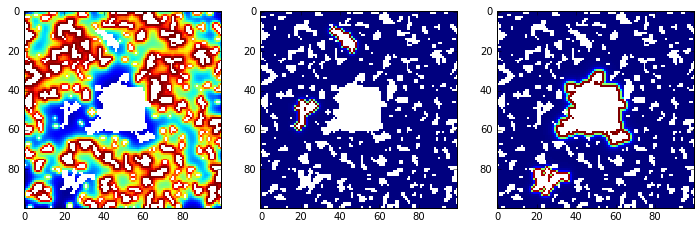

In [6]:
M = m.distance_feature(gamma = 2.5, partitioned = True)
fig, axarr = plt.subplots(1, 3, figsize=(12, 4))

for i in range(M.shape[0]):
    im = axarr[i].imshow(test[i], interpolation = 'nearest')

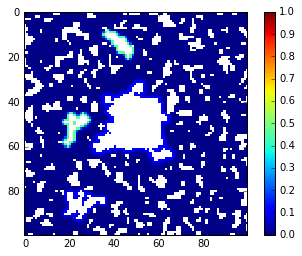

In [7]:
plt.imshow(test_density, interpolation = 'nearest', vmin = 0, vmax = 1)
plt.colorbar()

urban_growth/simulator_refactor.py:16: RuntimeWarning: invalid value encountered in less
  new_mat = (rands < prob) * 1


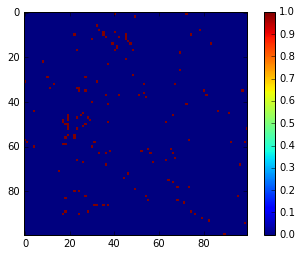

In [8]:
plt.imshow(m.sample(alpha = alpha, beta = beta, gamma = gamma), interpolation = 'nearest')
plt.colorbar()

In [9]:
test = m.dynamics(T_vec = [50, 100], 
                  alpha = alpha, 
                  beta = beta, 
                  gamma = gamma)     # note that this slows down when there are many clusters. 

Step 1 completed
Step 2 completed
Step 3 completed
Step 4 completed
Step 5 completed


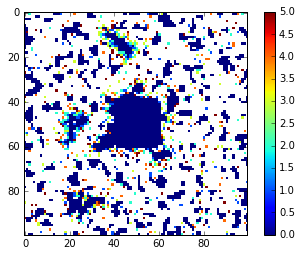

In [10]:
plt.imshow(test, interpolation = 'nearest')
plt.colorbar()